In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# === Step 1: Load metadata ===


In [47]:
metadata_path = r"D:\python\nasa rul\NASA Battery Dataset\metadata.csv"
df_meta = pd.read_csv(metadata_path)
df_meta.head(3)

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,discharge,[2010. 7. 21. 15. 0. ...,4,B0047,0,1,00001.csv,1.6743047446975208,NaN,NaN
1,impedance,[2010. 7. 21. 16. 53. ...,24,B0047,1,2,00002.csv,NaN,0.05605783343888099,0.20097016584458333
2,charge,[2010. 7. 21. 17. 25. ...,4,B0047,2,3,00003.csv,NaN,NaN,NaN


# === Step 2: Filter impedance entries ===

In [48]:
impedance_data = df_meta[df_meta["type"]=="impedance"].reset_index(drop=True)
impedance_data.head(1)

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,impedance,[2010. 7. 21. 16. 53. ...,24,B0047,1,2,00002.csv,NaN,0.05605783343888099,0.20097016584458333


*# Show how many impedance tests we have*

In [49]:
print(f"Total impedence files: {len(impedance_data)}")

Total impedence files: 1956


# === Step 3: Pick the first impedance file (you can change index later) ===

In [50]:
row = impedance_data.iloc[1955]
file_name = row["filename"]
imp_file_path = os.path.join(r"D:\python\nasa rul\NASA Battery Dataset\data", file_name)
imp_file_path

'D:\\python\\nasa rul\\NASA Battery Dataset\\data\\07561.csv'

# === Step 4: Load impedance CSV ===

In [51]:
df_imp = pd.read_csv(imp_file_path)
print(f"\column in the file:\n{df_imp.columns}")
df_imp.head(3)

\column in the file:
Index(['Sense_current', 'Battery_current', 'Current_ratio',
       'Battery_impedance', 'Rectified_Impedance'],
      dtype='object')


,Sense_current,Battery_current,Current_ratio,Battery_impedance,Rectified_Impedance
0,(899.2557983398438-53.335845947265625j),(257.71893310546875-64.55380249023438j),(3.332069682152593+0.6276679801864287j),(0.021403931525420285-0.05255263389122922j),(0.15099006606152504-0.002707939540964808j)
1,(895.5841674804688-60.256675720214844j),(262.35711669921875-58.57901382446289j),(3.300353663344868+0.5072276629074464j),(0.0838464132562133-0.1025076049416169j),(0.15066712064122664-0.0030319165962467767j)
2,(895.568115234375-66.10527801513672j),(260.6924133300781-52.82560348510742j),(3.3492049682965837+0.4250929062908192j),(0.15374917504757787-0.11550599168610474j),(0.14852515477567751-0.003086530945686598j)


# === Step 5: Use Rectified_Impedance as our complex Z ===
**# These are complex numbers like (a + bj)**

In [52]:
def safe_complex(x):
    try:
        if isinstance(x, str):
            return complex(x.replace(' ', ''))
        elif isinstance(x, complex):
            return x
        else:
            return complex(0, 0)  # fallback for NaN or unexpected type
    except:
        return complex(0, 0)

# Step 1: Clean and convert to complex
z = df_imp['Rectified_Impedance'].apply(safe_complex)

# Step 2: Extract real and imaginary parts
z_real = z.apply(lambda x: x.real)
z_imag = z.apply(lambda x: x.imag)



# Step 6: Plotting the Nyquist plot

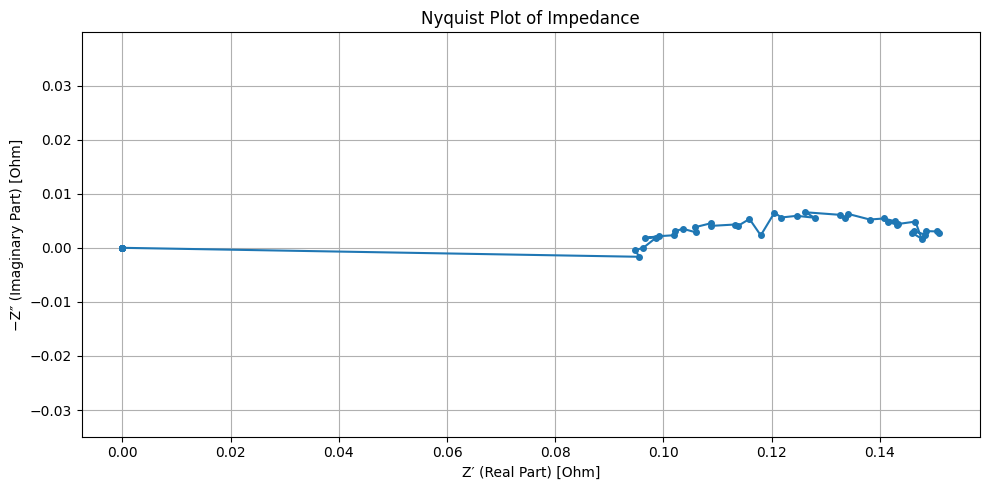

In [53]:
plt.figure(figsize=(10,5))
plt.plot(z_real,-z_imag,'o-',markersize =4)
plt.xlabel("Z′ (Real Part) [Ohm]")
plt.ylabel("−Z″ (Imaginary Part) [Ohm]")
plt.title("Nyquist Plot of Impedance")
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()